# Лаборатнорна робота №1

## Варiант 5
*   Файл з даними: NAICExpense.csv
*   Вiдгук: EXPENSES
*   Регресори: GPWPERSONAL, GPWCOMM, ASSETS, CASH, LIQUIDRATIO

### Для проведення регресiйного аналiзу потрбiно зробити наступне:

1. Побудувати ОНК, зробити висновки, щодо якостi моделi та ОНК.
2. Спробувати покращити оцiнку, шляхом використання гребеневої регресiї.
3. Спробуйте покращити оцiнку додавши у модель нелiнiйнiсть.
4. З’ясуйте чи можна зменшити кiлькiсть регресорiв без суттєвої шкоди для моделi.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/sample_data/NAICExpense.csv")
print(df.head(), "\n")
print(f"Розмір таблиці: {df.shape}")

                         COMPANY_NAME  GROUP  MUTUAL  STOCK         RBC  \
0            Tift Area Captive Ins Co      0       0      1   228184000   
1  Alliance Of Nonprofits For Ins RRG      0       0      0  1627708000   
2    GA Timber Harvesters Mut Captive      0       1      0   422907000   
3         American Natl Lloyds Ins Co      1       0      0   652906000   
4                   Chubb Natl Ins Co      1       0      1  8124624000   

   EXPENSES  STAFFWAGE  AGENTWAGE  LONGLOSS  SHORTLOSS  GPWPERSONAL   GPWCOMM  \
0  0.000802  84.405080  77.460997  0.000187   0.000000     0.000000  0.001375   
1  0.004488  81.567543  84.878023  0.002782   0.000000     0.000000  0.012273   
2  0.001905  84.405080  77.460997  0.001012   0.001330     0.000000  0.005028   
3  0.002291  82.497883  75.710707  0.000000   0.002980     0.029545  0.001986   
4  0.018296  79.264952  78.247902  0.010794   0.011777     0.040614  0.058094   

     ASSETS      CASH  LIQUIDRATIO  
0  0.002950  0.003258   1

## Фічиризація

In [78]:
from sklearn.model_selection import train_test_split


df = df.apply(pd.to_numeric, errors="ignore")
df_copy = df.fillna(df.mean())

columns = ["GPWPERSONAL", "GPWCOMM", "ASSETS", "CASH", "LIQUIDRATIO"]

# Нормалізація даних
for column in columns:
  df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

X = df_copy[columns].values
y = df_copy["EXPENSES"]

print(X)
print(y)

[[-0.30594177 -0.38193213 -0.34853747 -0.33998338  1.07555647]
 [-0.30594177 -0.3476159  -0.32959187 -0.32296222 -0.20883334]
 [-0.30594177 -0.37042866 -0.34689391 -0.3397345  -1.01190997]
 ...
 [-0.30594177  2.08637588  1.18781658  0.70043321 -1.67394531]
 [-0.10130034 -0.31588613 -0.31581534 -0.31398558 -0.83432794]
 [-0.30594177 -0.32567339 -0.34492996 -0.33635455  0.59777064]]
0      0.000802
1      0.004488
2      0.001905
3      0.002291
4      0.018296
         ...   
379    0.014602
380    0.000028
381    0.032323
382    0.004609
383    0.007078
Name: EXPENSES, Length: 384, dtype: float64


<ipython-input-78-abc2ee21e7dc>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy = df.fillna(df.mean())


## Навчання

In [79]:
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
lr_pred = linear_reg.predict(X_test)

print(f"X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}")

X_train: (307, 5); X_test: (77, 5); y_train: (307,); y_test: (77,)


## Оцінка

In [80]:
from sklearn.metrics import mean_squared_error


def mse(x, y):
  n = len(x.shape)
  return np.sum((x - y) ** 2) / n


print(f"mse_f: {mean_squared_error(y_test, lr_pred)}, mse: {mse(lr_pred, y_test)}")

mse_f: 0.002083086260759995, mse: 0.16039764207851961


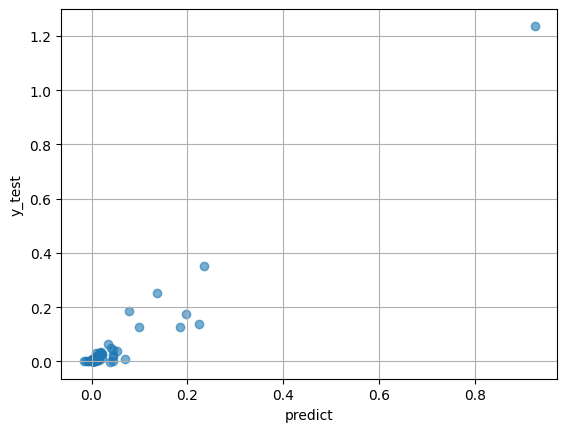

In [81]:
plt.grid()
plt.scatter(lr_pred, y_test, alpha=0.6)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

# plt.grid()
# plt.plot(lr_pred, y_test, color="r")
# plt.show()

In [82]:
x_te, x_val, y_te, y_val = train_test_split(X_test, y_test, test_size=0.3)

lr = LinearRegression().fit(x_te, y_te)

print(f"x_te: {x_te.shape}; x_val: {x_val.shape}; y_te: {y_te.shape}; y_val: {y_val.shape}")

x_te: (53, 5); x_val: (24, 5); y_te: (53,); y_val: (24,)


In [83]:
print(f"mse_te: {mse(lr.predict(x_te), y_te)}, mse_val: {mse(lr.predict(x_val), y_val)}")
print(f"mse_f_te: {mean_squared_error(y_te, lr.predict(x_te))}, mse_f_val: {mean_squared_error(y_val, lr.predict(x_val))}")

mse_te: 0.03201179276731332, mse_val: 0.007928345228745396
mse_f_te: 0.000603996089949308, mse_f_val: 0.0003303477178643915


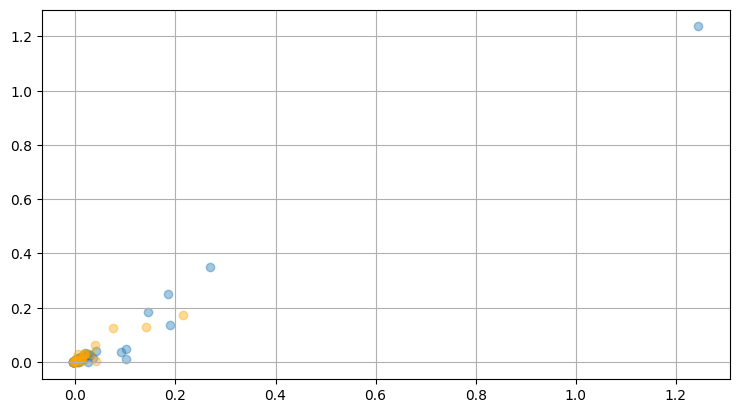

In [84]:
plt.grid()
plt.subplots_adjust(right=1.2)
plt.scatter(lr.predict(x_te), y_te, alpha=0.4)
plt.scatter(lr.predict(x_val), y_val, alpha=0.4, color="orange")
plt.show()

## Покращення моделі за допомогою регуляризатора
До функціонала, що оптимізується, додають L1 або L2 норму ваг, помножену на коефіцієнт регуляризації λ. У першому випадку метод називається Lasso, а в другому - Ridge.

In [85]:
from sklearn.linear_model import Lasso, Ridge


coefs_lasso = []
coefs_ridge = []

train_lasso_predicts = []
test_lasso_predicts = []

train_ridge_predicts = []
test_ridge_predicts = []

mse_lasso_tr = []
mse_lasso_te = []
mse_ridge_tr = []
mse_ridge_te = []

alphas = [0.1, 0.2, 0.3, 0.5, 0.7]

x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

for num, alpha in enumerate(alphas):
  lasso = Lasso(alpha=alpha).fit(x_lr_train, y_lr_train)
  y_tr_pred = lasso.predict(x_lr_train)
  y_te_pred = lasso.predict(x_lr_test)

  coefs_lasso.append(lasso.coef_)
  train_lasso_predicts.append(y_tr_pred)
  test_lasso_predicts.append(y_te_pred)

  mse_lasso_tr.append(mean_squared_error(y_lr_train, y_tr_pred))
  mse_lasso_te.append(mean_squared_error(y_lr_test, y_te_pred))


for num, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha).fit(x_lr_train, y_lr_train)
  y_tr_pred = ridge.predict(x_lr_train)
  y_te_pred = ridge.predict(x_lr_test)

  coefs_ridge.append(lasso.coef_)
  train_ridge_predicts.append(y_tr_pred)
  test_ridge_predicts.append(y_te_pred)

  mse_ridge_tr.append(mean_squared_error(y_lr_train, y_tr_pred))
  mse_ridge_te.append(mean_squared_error(y_lr_test, y_te_pred))


ridge_lasso = pd.DataFrame({
    "Train Lasso pred": train_lasso_predicts,
    "Test Lasso pred": test_lasso_predicts,
    "Train Ridge pred": train_lasso_predicts,
    "Test Ridge pred": test_lasso_predicts,
    "MSE tr Lasso": mse_lasso_tr,
    "MSE te Lasso": mse_lasso_te,
    "MSE tr Ridge": mse_ridge_tr,
    "MSE te Ridge": mse_ridge_te,
    "Lasso coef": coefs_lasso,
    "Ridge coef": coefs_ridge
  })

ridge_lasso

,Train Lasso pred,Test Lasso pred,Train Ridge pred,Test Ridge pred,MSE tr Lasso,MSE te Lasso,MSE tr Ridge,MSE te Ridge,Lasso coef,Ridge coef
0,"[0.04774546120768518, 0.032003762868696495, 0....","[0.031085300488496132, 0.031085188452858462, 0...","[0.04774546120768518, 0.032003762868696495, 0....","[0.031085300488496132, 0.031085188452858462, 0...",0.008510,0.001528,0.000574,0.000448,"[0.06224790990267034, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.05023473091791646, 0.04941754685759059, 0.0...","[0.049369867579221384, 0.049369861763220134, 0...","[0.05023473091791646, 0.04941754685759059, 0.0...","[0.049369867579221384, 0.049369861763220134, 0...",0.026215,0.001949,0.000589,0.000460,"[0.003231417517071486, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
2,"[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...",0.027525,0.001993,0.000595,0.000467,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
3,"[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...",0.027525,0.001993,0.000600,0.000477,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
4,"[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...","[0.05037102959344262, 0.05037102959344262, 0.0...",0.027525,0.001993,0.000602,0.000483,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"


Text(0.5, 1.0, 'Ridge')

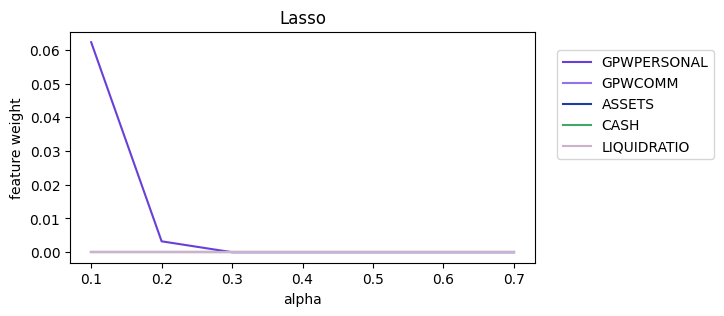

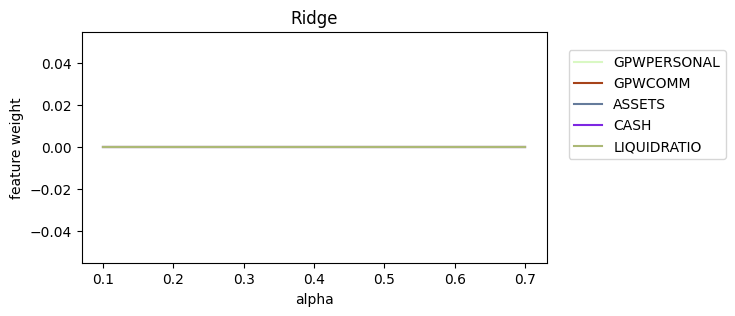

In [86]:
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

plt.figure(figsize=(6, 3))

for coef, feature in zip(coefs_lasso.T, df_copy[columns].columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(6, 3))

for coef, feature in zip(coefs_ridge.T, df_copy[columns].columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

## Чи можливо зменшити кількість регресорів без суттєвої шкоди для моделі?

In [87]:
df = pd.read_csv("/content/sample_data/NAICExpense.csv")
print(df.head(), "\n")
print(f"Розмір таблиці: {df.shape}")

                         COMPANY_NAME  GROUP  MUTUAL  STOCK         RBC  \
0            Tift Area Captive Ins Co      0       0      1   228184000   
1  Alliance Of Nonprofits For Ins RRG      0       0      0  1627708000   
2    GA Timber Harvesters Mut Captive      0       1      0   422907000   
3         American Natl Lloyds Ins Co      1       0      0   652906000   
4                   Chubb Natl Ins Co      1       0      1  8124624000   

   EXPENSES  STAFFWAGE  AGENTWAGE  LONGLOSS  SHORTLOSS  GPWPERSONAL   GPWCOMM  \
0  0.000802  84.405080  77.460997  0.000187   0.000000     0.000000  0.001375   
1  0.004488  81.567543  84.878023  0.002782   0.000000     0.000000  0.012273   
2  0.001905  84.405080  77.460997  0.001012   0.001330     0.000000  0.005028   
3  0.002291  82.497883  75.710707  0.000000   0.002980     0.029545  0.001986   
4  0.018296  79.264952  78.247902  0.010794   0.011777     0.040614  0.058094   

     ASSETS      CASH  LIQUIDRATIO  
0  0.002950  0.003258   1

In [88]:
'''

GPWPERSONAL - Gross premium written for personal lines, in millions of dollars (Сума виписаної премії для персональних ліній)
GPWCOMM - Gross premium written for commercial lines, in millions of dollars (Сума виписаної премії для комерційних премій)
ASSETS - Net admitted assets, in millions of dollars (Чисті узгоджені активи)
CASH - Cash and invested assets, in millions of dollars (Грошові та інвестовані активи)
LIQUIDRATIO - The ratio of the liquid assets to the current liabilities level (Відношення рівня ліквідних активів до поточних зобов'язань)

'''

# Щоб зрозуміти, чи можливо зменшити кількість регуляризаторів,
# треба оцінити їхню значущість

df = df.apply(pd.to_numeric, errors="ignore")
df_copy = df.fillna(df.mean())

columns = ["GPWPERSONAL", "GPWCOMM", "CASH", "LIQUIDRATIO"] # Без ASSETS

# Нормалізація даних
for column in columns:
  df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

X = df_copy[columns].values
y = df_copy["EXPENSES"]


from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
lr_pred = linear_reg.predict(X_test)

print(f"X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}")


from sklearn.metrics import mean_squared_error


def mse(x, y):
  n = len(x.shape)
  return np.sum((x - y) ** 2) / n


print(f"mse_f: {mean_squared_error(y_test, lr_pred)}, mse: {mse(lr_pred, y_test)}")

X_train: (307, 4); X_test: (77, 4); y_train: (307,); y_test: (77,)
mse_f: 0.0020390967927487983, mse: 0.15701045304165748


<ipython-input-88-fb7315292bcc>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy = df.fillna(df.mean())


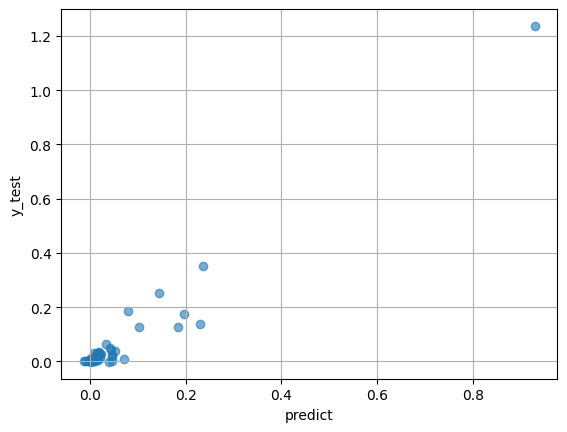

In [89]:
plt.grid()
plt.scatter(lr_pred, y_test, alpha=0.6)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

In [90]:
x_te, x_val, y_te, y_val = train_test_split(X_test, y_test, test_size=0.3)

lr = LinearRegression().fit(x_te, y_te)

print(f"x_te: {x_te.shape}; x_val: {x_val.shape}; y_te: {y_te.shape}; y_val: {y_val.shape}")

print(f"mse_te: {mse(lr.predict(x_te), y_te)}, mse_val: {mse(lr.predict(x_val), y_val)}")
print(f"mse_f_te: {mean_squared_error(y_te, lr.predict(x_te))}, mse_f_val: {mean_squared_error(y_val, lr.predict(x_val))}")

x_te: (53, 4); x_val: (24, 4); y_te: (53,); y_val: (24,)
mse_te: 0.0217651136396, mse_val: 0.026735551160031103
mse_f_te: 0.0004106625215018868, mse_f_val: 0.0011139812983346294


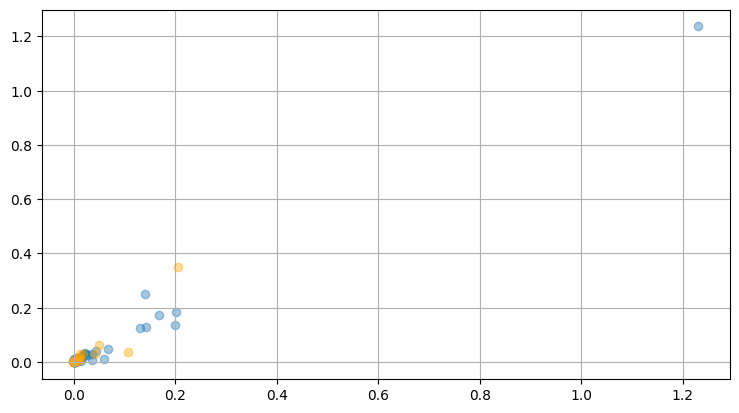

In [91]:
plt.grid()
plt.subplots_adjust(right=1.2)
plt.scatter(lr.predict(x_te), y_te, alpha=0.4)
plt.scatter(lr.predict(x_val), y_val, alpha=0.4, color="orange")
plt.show()

## Висновок "Без ASSETS"
Можна спостерігати невелике покращення в оцінці між `train` і `test` вибірках

```
mse_f_1: 0.002083086260759995, mse_1: 0.16039764207851961
mse_f_2: 0.0020390967927487983, mse_2: 0.15701045304165748
```
А оцінка при розподілі вибірок на `train`, `test`, `value` трішки гірша

```
mse_te_1: 0.030629980547456605, mse_val_1: 0.007174664028471184
mse_f_te_1: 0.0005779241612727661, mse_f_val_1: 0.00029894433451963263
```

```
mse_te_2: 0.02650884155420425, mse_val_2: 0.0208336335357253
mse_f_te_2: 0.0005001668217774387, mse_f_val_2: 0.0008680680639885542
```
### Спробуємо прибрати ще








In [92]:
df = df.apply(pd.to_numeric, errors="ignore")
df_copy = df.fillna(df.mean())

columns = ["GPWPERSONAL", "GPWCOMM", "CASH"] # Без ASSETS, LIQUIDRATIO

# Нормалізація даних
for column in columns:
  df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

X = df_copy[columns].values
y = df_copy["EXPENSES"]


from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
lr_pred = linear_reg.predict(X_test)

print(f"X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}")


from sklearn.metrics import mean_squared_error


def mse(x, y):
  n = len(x.shape)
  return np.sum((x - y) ** 2) / n


print(f"mse_f: {mean_squared_error(y_test, lr_pred)}, mse: {mse(lr_pred, y_test)}")

X_train: (307, 3); X_test: (77, 3); y_train: (307,); y_test: (77,)
mse_f: 0.0020474740184350517, mse: 0.15765549941949897


<ipython-input-92-ef59e2c0876e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy = df.fillna(df.mean())


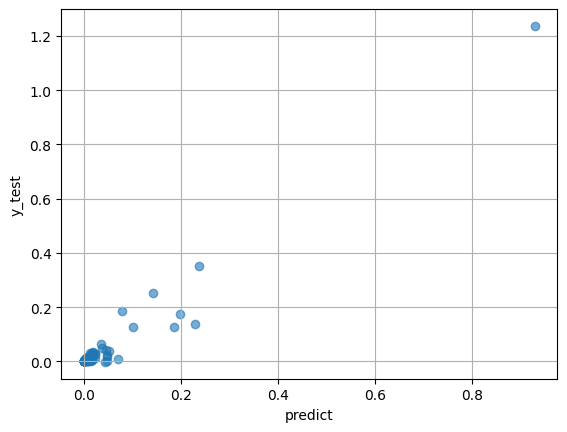

In [93]:
plt.grid()
plt.scatter(lr_pred, y_test, alpha=0.6)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

In [96]:
x_te, x_val, y_te, y_val = train_test_split(X_test, y_test, test_size=0.3)

lr = LinearRegression().fit(x_te, y_te)

print(f"x_te: {x_te.shape}; x_val: {x_val.shape}; y_te: {y_te.shape}; y_val: {y_val.shape}")

print(f"mse_te: {mse(lr.predict(x_te), y_te)}, mse_val: {mse(lr.predict(x_val), y_val)}")
print(f"mse_f_te: {mean_squared_error(y_te, lr.predict(x_te))}, mse_f_val: {mean_squared_error(y_val, lr.predict(x_val))}")

x_te: (53, 3); x_val: (24, 3); y_te: (53,); y_val: (24,)
mse_te: 0.021142493447790664, mse_val: 0.07230860206767105
mse_f_te: 0.0003989149707130314, mse_f_val: 0.0030128584194862936


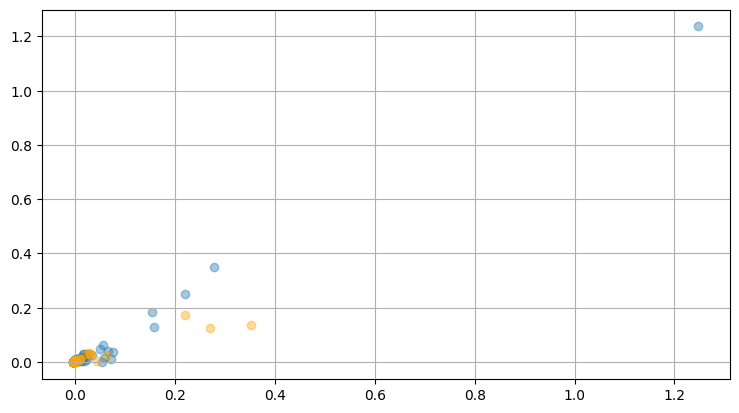

In [97]:
plt.grid()
plt.subplots_adjust(right=1.2)
plt.scatter(lr.predict(x_te), y_te, alpha=0.4)
plt.scatter(lr.predict(x_val), y_val, alpha=0.4, color="orange")
plt.show()

## Висновок "Без ASSETS і LIQUIDRATIO"

Вже майже явно гірші значення MSE для `train`, `test`, `value`, але, насправді, модель без особливих змін

### А зараз спробуємо прибрати регуляризатори, які явно вказують на можливі витрати

In [107]:
df = df.apply(pd.to_numeric, errors="ignore")
df_copy = df.fillna(df.mean())

columns = ["ASSETS", "CASH", "LIQUIDRATIO"] # Без GPWPERSONAL, GPWCOMM

# Нормалізація даних
for column in columns:
  df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

X = df_copy[columns].values
y = df_copy["EXPENSES"]


from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
lr_pred = linear_reg.predict(X_test)

print(f"X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}")


from sklearn.metrics import mean_squared_error


def mse(x, y):
  n = len(x.shape)
  return np.sum((x - y) ** 2) / n


print(f"mse_f: {mean_squared_error(y_test, lr_pred)}, mse: {mse(lr_pred, y_test)}")

X_train: (307, 3); X_test: (77, 3); y_train: (307,); y_test: (77,)
mse_f: 0.005149303659539393, mse: 0.3964963817845332


<ipython-input-107-a1a40cc10f2b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy = df.fillna(df.mean())


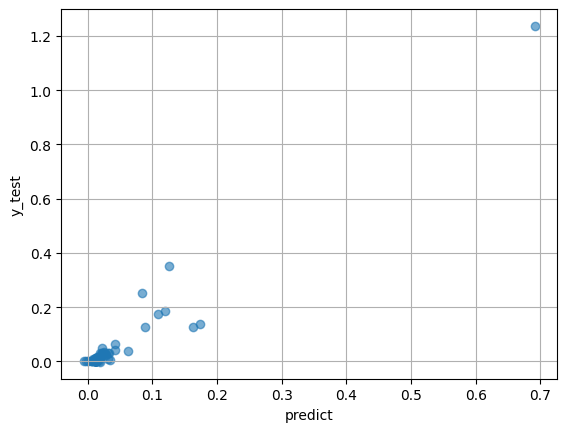

In [108]:
plt.grid()
plt.scatter(lr_pred, y_test, alpha=0.6)
plt.xlabel("predict")
plt.ylabel("y_test")
plt.show()

In [110]:
x_te, x_val, y_te, y_val = train_test_split(X_test, y_test, test_size=0.3)

lr = LinearRegression().fit(x_te, y_te)

print(f"x_te: {x_te.shape}; x_val: {x_val.shape}; y_te: {y_te.shape}; y_val: {y_val.shape}")

print(f"mse_te: {mse(lr.predict(x_te), y_te)}, mse_val: {mse(lr.predict(x_val), y_val)}")
print(f"mse_f_te: {mean_squared_error(y_te, lr.predict(x_te))}, mse_f_val: {mean_squared_error(y_val, lr.predict(x_val))}")

x_te: (53, 3); x_val: (24, 3); y_te: (53,); y_val: (24,)
mse_te: 0.05128678222548881, mse_val: 0.00238623991558501
mse_f_te: 0.0009676751363299776, mse_f_val: 9.942666314937541e-05


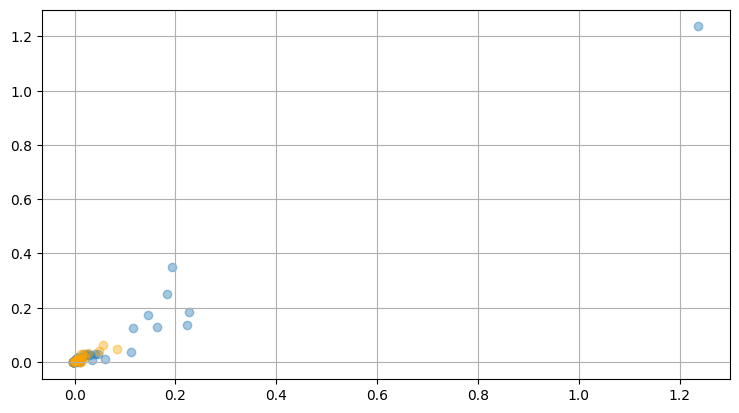

In [111]:
plt.grid()
plt.subplots_adjust(right=1.2)
plt.scatter(lr.predict(x_te), y_te, alpha=0.4)
plt.scatter(lr.predict(x_val), y_val, alpha=0.4, color="orange")
plt.show()

## Висновок "Без GPWPERSONAL і GPWCOMM"

Явно зросли значення MSE оцінки, що не є дуже добрим показником

На графіку можемо спостерігати, як відстань між деякими ознаками є зависокою (слабка кореляція), що може призвести до неточностей у передбаченнях

При декількох повтореннях процедури запуску коду (навчання) ознаки на графіках і значення оцінок сильно коливаються і не є стабільними



---

#Висновок

## 1) Якість побудованої лінійної регресії за допомогою `LinearRegression` from `sklearn.linear_model` для передбачення витрат є досить хорошою

## 2) Покращення оцінки за допомогою регуляризаторів (`Lasso`, `Ridge`)
#### При регуляризаторі `Ridge` значне покращення: оцінка MSE мала нулі до 4 знаку після коми

#### **До Ridge / Lasso**:

```
mse_f: 0.002083086260759995, mse: 0.16039764207851961

mse_te: 0.03201179276731332, mse_val: 0.007928345228745396

mse_f_te: 0.000603996089949308, mse_f_val: 0.0003303477178643915
```

#### **Після**:

```
MSE train Lasso: 0.008510, 0.026215, 0.027525, 0.027525

MSE test Lasso: 0.001528, 0.001949, 0.001993, 0.001993

MSE train Ridge: 0.000574, 0.000589, 0.000589, 0.000600

MSE test Ridge: 0.000448, 0.000460, 0.000467, 0.000477
```

## 3) Насправді, можна зменшити кількість регуляризаторів без суттєвої шкоди для моделі

